<a href="https://colab.research.google.com/github/vtu23260-cmd/data-visualization/blob/main/DV_Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated plots: 'monthly_avg_temp.png', 'seasonal_decomposition.png', 'monthly_temp_range_area_chart.png'


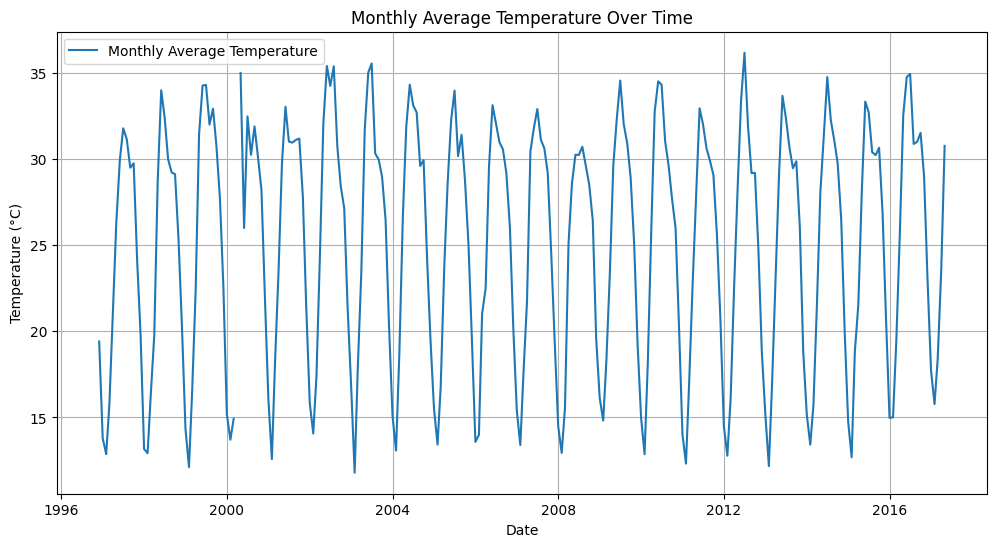

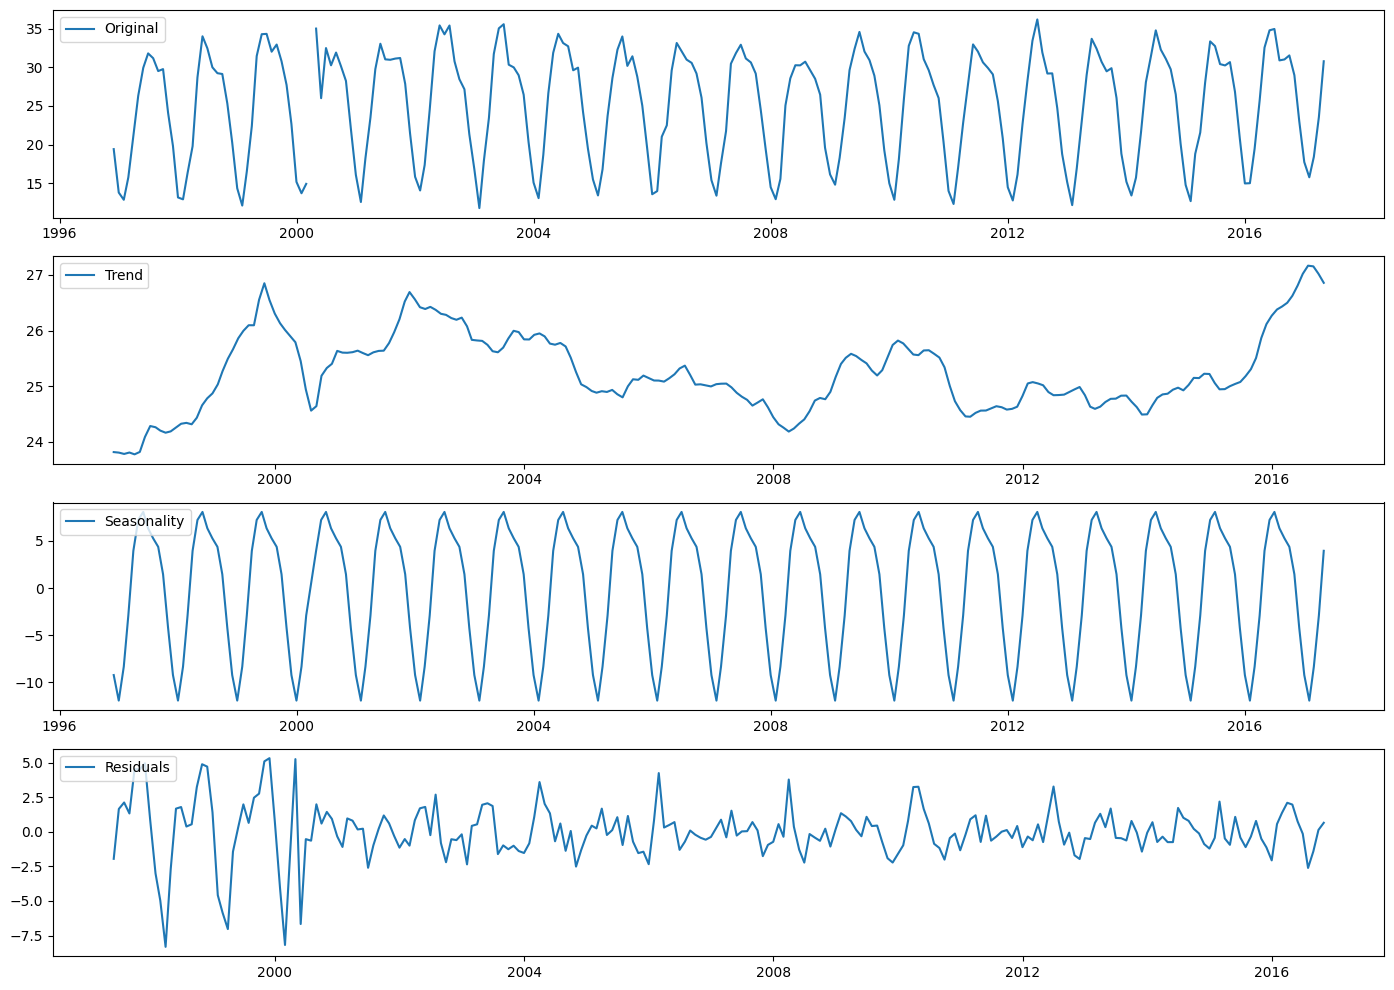

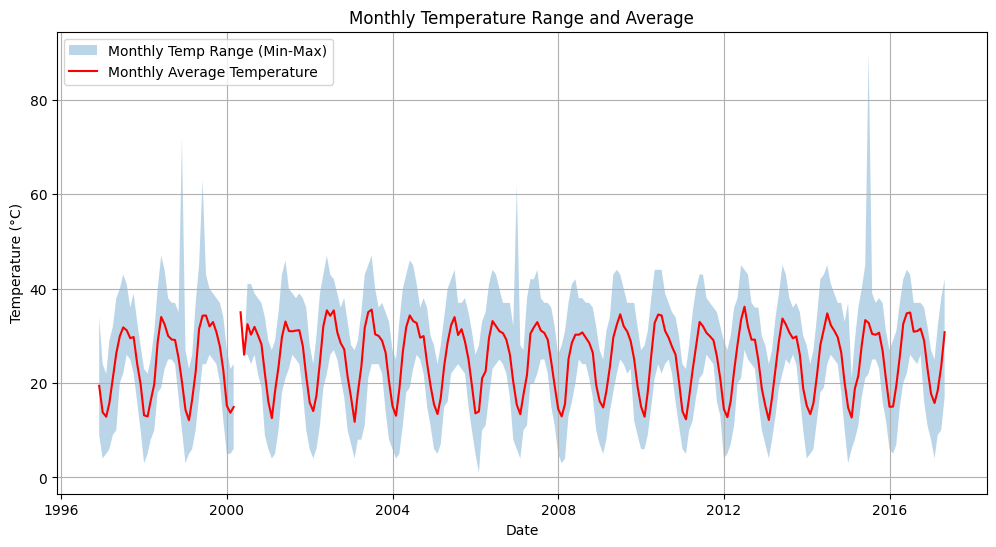

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset from the CSV file
df = pd.read_csv('testset.csv')

# --- Data Preprocessing ---

# Rename columns for easier access
df.rename(columns=lambda x: x.strip().replace(' ', '_').replace('-', '_'), inplace=True)
df.rename(columns={'_conds': 'conditions',
                   '_dewptm': 'dew_point',
                   '_fog': 'fog',
                   '_hail': 'hail',
                   '_heatindexm': 'heat_index',
                   '_hum': 'humidity',
                   '_precipm': 'precipitation',
                   '_pressurem': 'pressure',
                   '_rain': 'rain',
                   '_snow': 'snow',
                   '_tempm': 'temperature',
                   '_thunder': 'thunder',
                   '_tornado': 'tornado',
                   '_vism': 'visibility',
                   '_wdird': 'wind_direction_degrees',
                   '_wdire': 'wind_direction_cardinal',
                   '_wgustm': 'wind_gust',
                   '_windchillm': 'wind_chill',
                   '_wspdm': 'wind_speed'}, inplace=True)


# Convert the 'datetime_utc' column to datetime objects for time series analysis
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

# Set the 'datetime_utc' column as the index of the DataFrame
df.set_index('datetime_utc', inplace=True)

# Replace placeholder -9999 values with NaN (Not a Number) to represent missing data
df.replace(-9999, np.nan, inplace=True)

# Use forward-fill to handle missing values, carrying over the last valid observation
df.ffill(inplace=True)

# Resample the data to monthly averages to identify long-term trends
# Updated from 'M' to 'ME' to address the FutureWarning
monthly_df = df[['temperature', 'pressure', 'humidity']].resample('ME').mean()

# --- Time Series Analysis and Visualization ---

# 1. Line Graph of Monthly Average Temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['temperature'], label='Monthly Average Temperature')
plt.title('Monthly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.savefig('monthly_avg_temp.png')

# 2. Decompose the time series to identify Trend, Seasonality, and Residuals
decomposition = seasonal_decompose(monthly_df['temperature'].dropna(), model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
# Corrected attribute from 'residue' to 'resid'
residual = decomposition.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(monthly_df['temperature'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('seasonal_decomposition.png')


# 3. Area Chart to visualize the range of temperatures each month
# Updated from 'M' to 'ME'
monthly_temp_range = df['temperature'].resample('ME').agg(['mean', 'min', 'max'])
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_temp_range.index, monthly_temp_range['min'], monthly_temp_range['max'], alpha=0.3, label='Monthly Temp Range (Min-Max)')
plt.plot(monthly_temp_range.index, monthly_temp_range['mean'], label='Monthly Average Temperature', color='red')
plt.title('Monthly Temperature Range and Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.savefig('monthly_temp_range_area_chart.png')

print("Generated plots: 'monthly_avg_temp.png', 'seasonal_decomposition.png', 'monthly_temp_range_area_chart.png'")